### **1. Data Engineering**

#### **1.1. Objetivo da Análise**

Com base no dataset `telco-customer-churn.csv`, nosso objetivo é realizar uma análise exploratória para entender os fatores que contribuem para o churn (cancelamento) de clientes em uma empresa de telecomunicações. Em seguida, construiremos um modelo de Machine Learning para prever quais clientes têm maior probabilidade de cancelar seus serviços.

**Considerações:**  
Nesta etapa, definimos que nosso objetivo será abordar a questão do churn de clientes, que é um problema comum em empresas de telecomunicações. A análise exploratória nos ajudará a entender melhor os dados, e o modelo de previsão poderá ser útil para ações de retenção de clientes.

#### **1.2. Primeiro Passo da Análise**

Vamos começar a análise carregando os dados e exibindo as primeiras linhas do dataset, informações gerais e estatísticas descritivas.

In [1]:
import pandas as pd

# Carregar o dataset
file_path = 'data/telco-customer-churn.csv'
data = pd.read_csv(file_path)

# Exibir as primeiras linhas do dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Informações gerais sobre o dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Estatísticas descritivas do dataset
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Considerações:**  
O objetivo desta etapa é verificar a estrutura do dataset, incluindo os tipos de dados e a presença de valores nulos, bem como ter uma visão geral das estatísticas descritivas, como média, desvio padrão e distribuição dos dados.

**Resultado:**

- **Primeiras Linhas do Dataset:**

| customerID | gender | SeniorCitizen | Partner | Dependents | tenure | PhoneService | MultipleLines    | InternetService | OnlineSecurity | ... | TotalCharges | Churn |
| ---------- | ------ | ------------- | ------- | ---------- | ------ | ------------ | ---------------- | --------------- | -------------- | --- | ------------ | ----- |
| 7590-VHVEG | Female | 0             | Yes     | No         | 1      | No           | No phone service | DSL             | No             | ... | 29.85        | No    |
| 5575-GNVDE | Male   | 0             | No      | No         | 34     | Yes          | No               | DSL             | Yes            | ... | 1889.50      | No    |
| 3668-QPYBK | Male   | 0             | No      | No         | 2      | Yes          | No               | DSL             | Yes            | ... | 108.15       | Yes   |
| 7795-CFOCW | Male   | 0             | No      | No         | 45     | No           | No phone service | DSL             | Yes            | ... | 1840.75      | No    |
| 9237-HQITU | Female | 0             | No      | No         | 2      | Yes          | No               | Fiber optic     | No             | ... | 151.65       | Yes   |

- **Informações Gerais sobre o Dataset:**

O dataset possui 7.043 entradas e 21 colunas. A maioria das colunas contém dados do tipo `object` (texto), exceto `SeniorCitizen`, `tenure`, e `MonthlyCharges`, que são numéricas. Não há valores nulos nos dados.

- **Estatísticas Descritivas:**

Para as colunas numéricas:

- `SeniorCitizen`: A média é 0,162, indicando que cerca de 16,2% dos clientes são idosos.
- `tenure`: Os clientes têm um tempo médio de 32,37 meses com a empresa.
- `MonthlyCharges`: A cobrança mensal média é de aproximadamente $64,76.

**Considerações:**  
As primeiras linhas e estatísticas descritivas nos dão uma ideia inicial dos dados. Observamos que o dataset possui uma mistura de variáveis categóricas e numéricas. As colunas `TotalCharges` e `Churn` serão particularmente importantes para nossa análise de churn.

### **2. Visualização dos Dados de Churn**

**Objetivo:**

Nesta etapa, vamos criar visualizações que nos ajudem a entender a distribuição dos clientes que cancelaram o serviço (`Churn`). Isso nos permitirá obter insights iniciais sobre o impacto do churn no dataset.

**Código:**

Vamos utilizar a biblioteca `matplotlib` para criar um gráfico de barras que mostre a distribuição de clientes que cancelaram (`Yes`) e que não cancelaram (`No`) o serviço.

In [4]:
import matplotlib.pyplot as plt

# Contagem dos valores de Churn
churn_counts = data['Churn'].value_counts() / data.shape[0] * 100

# Exibir o percentual de Churn
churn_counts.round(0)

Churn
No     73.0
Yes    27.0
Name: count, dtype: float64

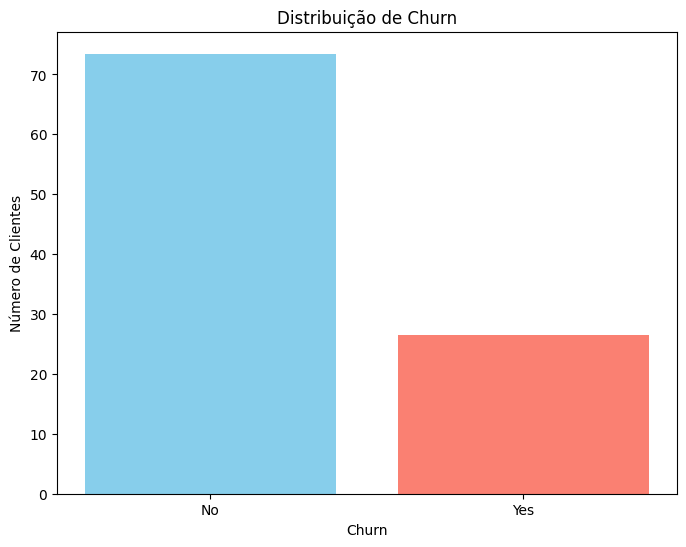

In [5]:
# Visualização da distribuição de Churn
plt.figure(figsize=(8, 6))
plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

**Considerações:**

Este gráfico de barras nos mostrará a proporção de clientes que cancelaram o serviço em comparação com aqueles que permaneceram. Isso é útil para entender a magnitude do churn no dataset.

**Resultado:**

A visualização mostra a distribuição dos clientes que cancelaram (`Yes`) e que não cancelaram (`No`) o serviço. Observamos que a maioria dos clientes no dataset não cancelou o serviço (`73%`), mas há uma quantidade significativa que o fez (`27%`). Este insight inicial é fundamental para entender a gravidade do churn e como ele pode impactar a empresa.

### **3. Ajustes Iniciais nos Dados**

**Objetivo:**

Nesta etapa, faremos os primeiros ajustes nos dados para facilitar a análise e a construção do modelo. Especificamente, vamos:

- Converter os atributos binários (aqueles com apenas duas alternativas) para valores numéricos `0` e `1`.
- Converter a coluna `TotalCharges` para um formato numérico, pois atualmente ela está sendo tratada como uma string.

#### **3.1. Conversão de Atributos Binários**

Vamos identificar os atributos binários e convertê-los de valores categóricos (`Yes/No`, `Male/Female`, etc.) para valores numéricos `0` e `1`.

In [6]:
# Identificando as colunas binárias
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                  'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Dicionário de mapeamento para a conversão
binary_mapping = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}

# Aplicando a conversão
data[binary_columns] = data[binary_columns].applymap(lambda x: binary_mapping.get(x, x))

/tmp/ipykernel_14204/3482488558.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[binary_columns] = data[binary_columns].applymap(lambda x: binary_mapping.get(x, x))


**Considerações:**  
Ao converter esses atributos, estamos facilitando a manipulação dos dados e a aplicação de modelos de Machine Learning, que geralmente exigem entradas numéricas.

#### **3.2. Conversão de `TotalCharges` para Formato Numérico**

A coluna `TotalCharges` atualmente está no formato `object` (string), o que é inadequado para cálculos numéricos. Vamos convertê-la para o formato `float`.

In [7]:
# Conversão da coluna TotalCharges para numérico, com tratamento de valores não numéricos
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Verificando se houve valores nulos após a conversão
null_total_charges = data['TotalCharges'].isnull().sum()

null_total_charges

11

In [8]:
# Exibir as primeiras linhas do dataset atualizado
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


#### 3.3. Remoção do identificador do cliente `customerID`

A coluna `customerID` é apenas um identificador de clientes e é desnecessária para nossa análise.

In [9]:
# Remover o identificador do cliente
data.drop('customerID', axis=1, inplace=True)

# Exibir as primeiras linhas do dataset atualizado
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


**Considerações:**  
Durante a conversão, alguns valores podem não ser convertidos adequadamente (por exemplo, strings vazias), resultando em valores `NaN`. Identificaremos quantos valores foram afetados para posterior tratamento.

**Resultado:**

- **Conversão de Atributos Binários:**  
  Os atributos binários foram convertidos com sucesso para valores numéricos `0` e `1`. Agora, as colunas como `gender`, `Partner`, `Dependents`, e `Churn` estão representadas numericamente, o que facilitará futuras análises e modelagem.

- **Conversão da Coluna `TotalCharges`:**  
  A coluna `TotalCharges` foi convertida para o formato numérico (`float`). Durante a conversão, 11 valores foram identificados como `NaN` (valores nulos), o que sugere que havia dados não numéricos ou ausentes nessa coluna.

- **Remoção da coluna `customerID`:**
  A coluna `customerID` foi removida com sucesso.

**Considerações:**  
Esses 11 valores nulos em `TotalCharges` precisam ser tratados. Podemos optar por removê-los ou substituí-los por uma média ou mediana, dependendo da estratégia que escolhermos para o pré-processamento dos dados.

### **4. Tratamento de Valores Nulos**

**Objetivo:**

Nesta etapa, vamos tratar os 11 valores nulos identificados na coluna `TotalCharges`. Como o número de linhas afetadas é pequeno em relação ao tamanho total do dataset, optaremos por remover essas linhas diretamente.

#### **4.1. Remoção das Linhas com Valores Nulos**

Vamos remover as linhas que possuem valores nulos na coluna `TotalCharges`.

In [10]:
# Remover as linhas onde TotalCharges é nulo
data_cleaned = data.dropna(subset=['TotalCharges'])

# Verificando o número de linhas restantes
remaining_rows = data_cleaned.shape[0]

data_cleaned.shape

(7032, 20)

**Considerações:**  
Essa abordagem garante que todos os dados restantes no dataset estejam completos, sem valores ausentes, o que facilita a análise e modelagem subsequente.

**Resultado:**

Após a remoção das 11 linhas com valores nulos na coluna `TotalCharges`, o dataset agora contém 7.032 linhas. Todas as linhas restantes possuem dados completos, o que facilita as próximas etapas de análise e modelagem.

### **5. Análise de Correlação**

**Objetivo:**

Nesta etapa, vamos calcular a correlação entre as variáveis numéricas do dataset, focando em como elas se relacionam com a variável `Churn`. Isso nos ajudará a identificar quais atributos têm maior impacto no churn de clientes.

#### **5.1. Cálculo da Correlação**

Vamos calcular a matriz de correlação para todas as variáveis numéricas no dataset.

In [11]:
# Calcular a matriz de correlação selecionando apenas as variáveis numéricas
numeric_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data_cleaned[numeric_columns].corr()

# Exibir a correlação da variável Churn com as outras
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
churn_correlation.round(3)

Churn               1.000
MonthlyCharges      0.193
PaperlessBilling    0.191
SeniorCitizen       0.151
PhoneService        0.012
gender             -0.009
Partner            -0.150
Dependents         -0.163
TotalCharges       -0.199
tenure             -0.354
Name: Churn, dtype: float64

**Considerações:**  
A matriz de correlação nos permitirá identificar quais variáveis têm uma correlação positiva ou negativa mais forte com o churn. Valores próximos de 1 indicam uma forte correlação positiva, enquanto valores próximos de -1 indicam uma forte correlação negativa.

**Resultado:**

A análise de correlação com a variável `Churn` resultou nas seguintes correlações:

- `MonthlyCharges`: 0.193 (correlação positiva)
- `PaperlessBilling`: 0.191 (correlação positiva)
- `SeniorCitizen`: 0.151 (correlação positiva)
- `tenure`: -0.354 (correlação negativa)
- `TotalCharges`: -0.199 (correlação negativa)
- `Partner`: -0.150 (correlação negativa)
- `Dependents`: -0.163 (correlação negativa)

**Considerações:**

- A variável `tenure` (tempo de contrato) tem a correlação negativa mais forte com o churn, sugerindo que quanto mais tempo um cliente permanece na empresa, menor a probabilidade de churn.
- `MonthlyCharges` e `PaperlessBilling` têm correlações positivas, indicando que cobranças mensais mais altas e o uso de faturamento sem papel estão associados a uma maior probabilidade de churn.
- A correlação das outras variáveis, embora presentes, é relativamente baixa.

Essas informações podem nos ajudar a identificar quais variáveis são mais influentes para prever o churn em clientes.

### **6. Visualização da Matriz de Correlação**

**Objetivo:**

Nesta etapa, vamos criar uma visualização gráfica da matriz de correlação para entender melhor as relações entre todas as variáveis numéricas do dataset, com foco especial na variável `Churn`.

#### **6.1. Geração do Heatmap de Correlação**

Vamos utilizar a biblioteca `seaborn` para gerar um heatmap que mostrará a correlação entre todas as variáveis numéricas.

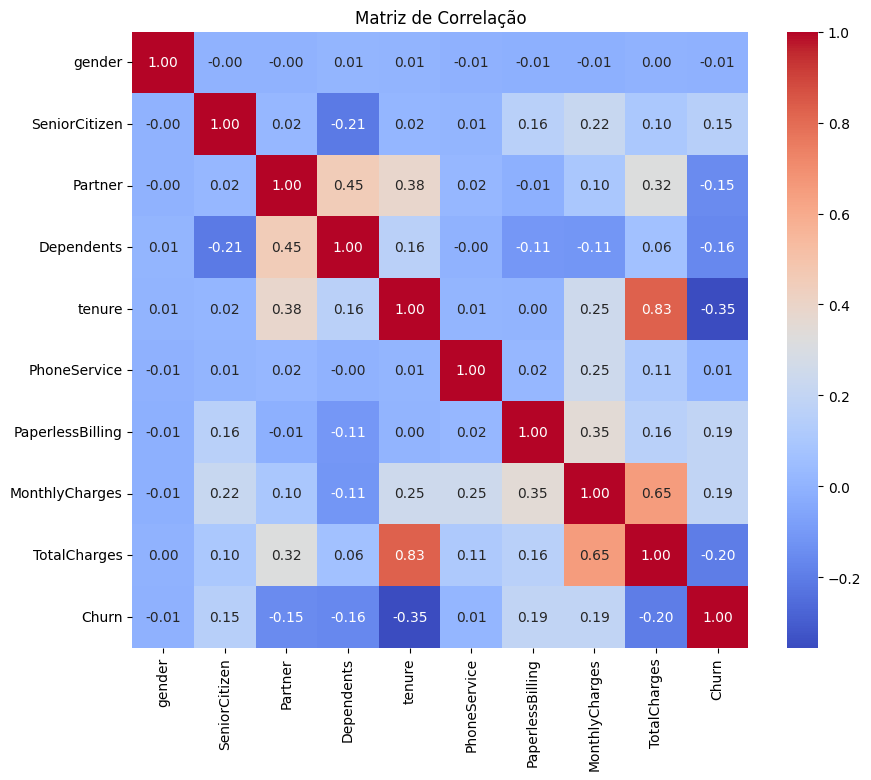

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração do tamanho da figura
plt.figure(figsize=(10, 8))

# Gerar o heatmap da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Título do gráfico
plt.title('Matriz de Correlação')
plt.show()

**Considerações:**  
O heatmap nos dará uma visão clara das correlações, destacando as relações positivas e negativas entre as variáveis. Cores mais escuras indicarão correlações mais fortes, enquanto cores claras indicarão correlações mais fracas.

**Resultado:**

A visualização mostra a matriz de correlação das variáveis numéricas do dataset em forma de heatmap. As cores variam de azul (correlação negativa forte) a vermelho (correlação positiva forte), com valores numéricos sobrepostos para facilitar a interpretação.

O heatmap evidencia as relações entre as variáveis, com especial atenção à coluna `Churn`. Como observado anteriormente, `tenure` tem uma forte correlação negativa, enquanto `MonthlyCharges` e `PaperlessBilling` têm correlações positivas com `Churn`.

### **7. Codificação de Variáveis Categóricas**

**Objetivo:**

Nesta etapa, vamos realizar a codificação das variáveis categóricas do dataset, transformando-as em variáveis numéricas para que possam ser utilizadas em modelos de Machine Learning. Faremos isso utilizando a técnica de codificação "One-Hot Encoding".

#### **7.1. Identificação e Codificação de Variáveis Categóricas**

Primeiro, identificaremos as colunas que ainda são categóricas e as codificaremos usando a técnica de `One-Hot Encoding`.

In [13]:
# Identificar as colunas categóricas restantes
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True, dtype='int64')

# Exibir as primeiras linhas do dataset após a codificação
data_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_No internet service,StreamingTV_1,StreamingTV_No internet service,StreamingMovies_1,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


**Considerações:**  
A técnica de One-Hot Encoding converte cada categoria de uma variável categórica em uma nova coluna binária, com valores `0` ou `1`. Ao usar `drop_first=True`, evitamos a multicolinearidade removendo uma das colunas geradas para cada variável categórica.

**Resultado:**

As variáveis categóricas foram codificadas com sucesso utilizando a técnica de One-Hot Encoding. Agora, o dataset resultante possui várias novas colunas binárias que representam as categorias das variáveis originalmente categóricas.

Este processo expande o número de colunas, mas mantém a informação necessária para que os modelos de Machine Learning possam processá-las adequadamente.

### **8. Normalização de Dados**

**Objetivo:**

Nesta etapa, vamos aplicar a normalização apenas nos atributos que possuem valores contínuos e diferentes dos binários, especificamente nas colunas `tenure`, `MonthlyCharges`, e `TotalCharges`. Isso garantirá que essas variáveis fiquem dentro de uma escala comum, facilitando a modelagem posterior.

#### **8.1. Aplicação da Normalização**

Vamos normalizar as colunas selecionadas usando o `MinMaxScaler` da biblioteca `sklearn`.

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Colunas a serem normalizadas
columns_to_normalize = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Inicializar o escalador
scaler = MinMaxScaler()

# Aplicar normalização apenas nas colunas selecionadas
data_normalized_specific = data_encoded.copy()
data_normalized_specific[columns_to_normalize] = scaler.fit_transform(data_encoded[columns_to_normalize])

# Exibir as primeiras linhas do dataset após a normalização específica
data_normalized_specific.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_No internet service,StreamingTV_1,StreamingTV_No internet service,StreamingMovies_1,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,1,0.115423,0.001275,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,0.385075,0.215867,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0.014085,1,1,0.354229,0.010310,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,0.239303,0.210241,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0.014085,1,1,0.521891,0.015330,1,...,0,0,0,0,0,0,0,0,1,0


In [15]:
data_normalized_specific.columns.to_list()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'MultipleLines_1',
 'MultipleLines_No phone service',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_1',
 'OnlineSecurity_No internet service',
 'OnlineBackup_1',
 'OnlineBackup_No internet service',
 'DeviceProtection_1',
 'DeviceProtection_No internet service',
 'TechSupport_1',
 'TechSupport_No internet service',
 'StreamingTV_1',
 'StreamingTV_No internet service',
 'StreamingMovies_1',
 'StreamingMovies_No internet service',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

**Considerações:**  
A normalização dos atributos contínuos garantirá que todas essas variáveis sejam comparáveis em termos de escala, o que pode melhorar a performance de alguns algoritmos de Machine Learning.

**Resultado:**

As colunas `tenure`, `MonthlyCharges` e `TotalCharges` foram normalizadas com sucesso, sendo escaladas para o intervalo entre 0 e 1. As demais colunas, especialmente as variáveis binárias, permaneceram inalteradas.

Isso garantirá que as variáveis contínuas sejam comparáveis em termos de escala, enquanto as variáveis categóricas e binárias permanecem adequadas para modelagem.

Gostaria de prosseguir com alguma outra etapa, como a construção de modelos de Machine Learning, ou há mais alguma coisa que deseja explorar?

### **9. Separação do Dataset em Treinamento, Validação e Teste com Estratificação**

**Objetivo:**

Vamos fazer a separação do dataset em três conjuntos: treinamento, validação e teste, utilizando estratificação para garantir que a distribuição da variável `Churn` seja consistente em todos os conjuntos. A divisão será feita nas proporções 70% para treinamento, 15% para validação e 15% para teste.

#### **9.1. Divisão do Dataset com Estratificação**

Vamos aplicar a estratificação com base na variável `Churn` durante a divisão dos dados.

In [16]:
from sklearn.model_selection import train_test_split

# Separação inicial em treinamento e temp (que será dividido em validação e teste)
train_data, temp_data = train_test_split(
    data_normalized_specific, test_size=0.3, random_state=42, stratify=data_normalized_specific['Churn']
)

# Separação de temp em validação e teste
val_data, test_data = train_test_split(
    temp_data, test_size=0.5, random_state=42, stratify=temp_data['Churn']
)

#### **9.2. Salvando os Conjuntos de Dados**

Além dos datasets divididos, vamos também salvar o dataset pré-processado completo.

In [17]:
# Salvando os datasets em arquivos CSV
train_data.to_csv('data/telco-customer-churn-train-data.csv', index=False)
val_data.to_csv('data/telco-customer-churn-val-data.csv', index=False)
test_data.to_csv('data/telco-customer-churn-test-data.csv', index=False)
data_normalized_specific.to_csv('data/telco-customer-churn-preprocessed-data.csv', index=False)

**Considerações:**  
A estratificação garante que a proporção de classes na variável `Churn` seja mantida nos três conjuntos de dados, o que é importante para garantir a representatividade durante o treinamento, validação e teste do modelo.

**Resultado:**

Os conjuntos de dados foram divididos com estratificação e salvos com sucesso.